In [49]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import os
currentdir=os.getcwd()
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(1, parentdir+'/src')

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings('ignore')

In [52]:
folder_path = parentdir+'/data/ddp/'
folder_path1 = parentdir+'/data/mocap3.3/'

com_filename = folder_path+'com_data.csv'
com_filename1 = folder_path1+'com_data.csv'
com = np.loadtxt(com_filename, delimiter=',')
com1 = np.loadtxt(com_filename1, delimiter=',')

rg_vel_norm_filename = folder_path+'bullet_gripper_vel_time_norm.csv'
rg_vel_norm_filename1 = folder_path1+'bullet_gripper_vel_time_norm.csv'
rg_vel_norm = np.loadtxt(rg_vel_norm_filename, delimiter=',', skiprows=1)
rg_vel_norm1 = np.loadtxt(rg_vel_norm_filename1, delimiter=',', skiprows=1)

gnf_l_filename = folder_path+'bullet_l_gnf.csv'
gnf_l = np.loadtxt(gnf_l_filename, delimiter=',')

gnf_r_filename = folder_path+'bullet_r_gnf.csv'
gnf_r = np.loadtxt(gnf_r_filename, delimiter=',')

am_filename = folder_path+'am_data.csv'
am_filename1 = folder_path1+'am_data.csv'
am = np.loadtxt(am_filename, delimiter=',')
am1 = np.loadtxt(am_filename1, delimiter=',')

rg_vel_filename = folder_path+'rg_vel_data.csv'
rg_vel_filename1 = folder_path1+'rg_vel_data.csv'
rg_vel = np.loadtxt(rg_vel_filename, delimiter=',')
rg_vel1 = np.loadtxt(rg_vel_filename1, delimiter=',')

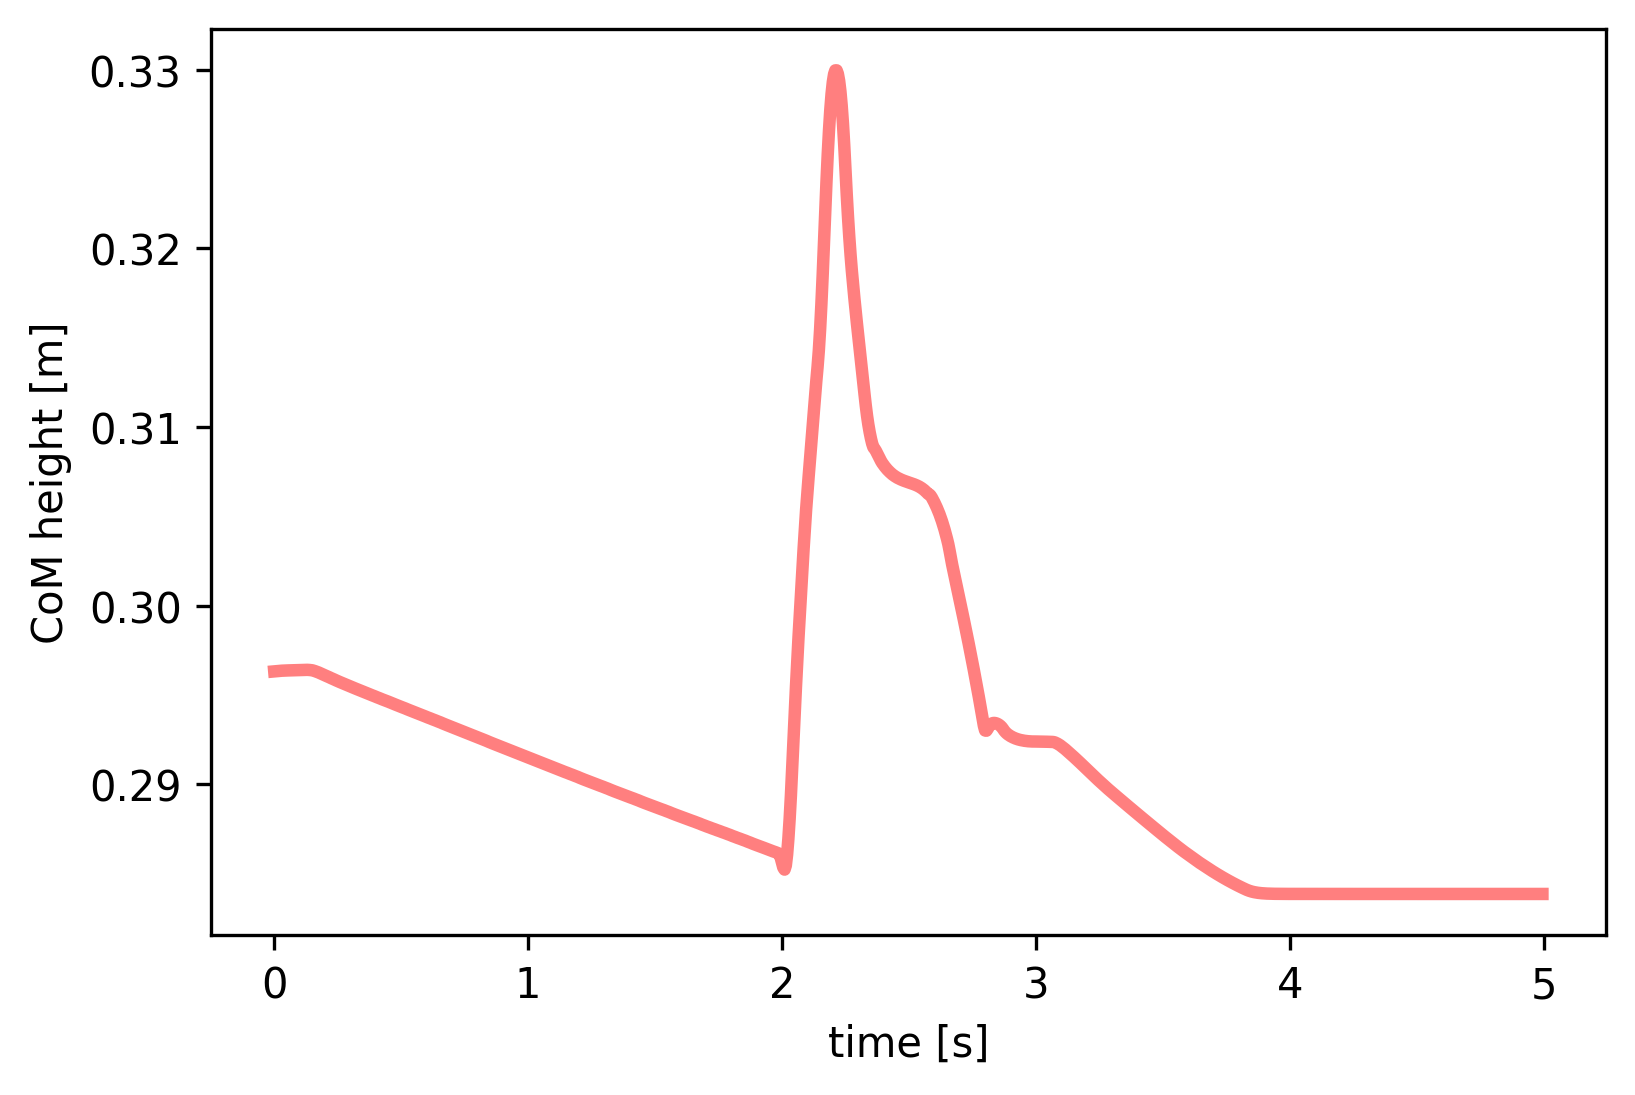

In [59]:
plt.figure(dpi=300)
# plt.plot(com[:1000,0], com[:1000,3], label='CoM Height',lw=3, c='r',alpha =.5)
plt.plot(com1[:1000,0], com1[:1000,3], label='CoM Height',lw=3, c='r',alpha =.5)
plt.ylabel('CoM height [m]')
plt.xlabel('time [s]')
plt.show()

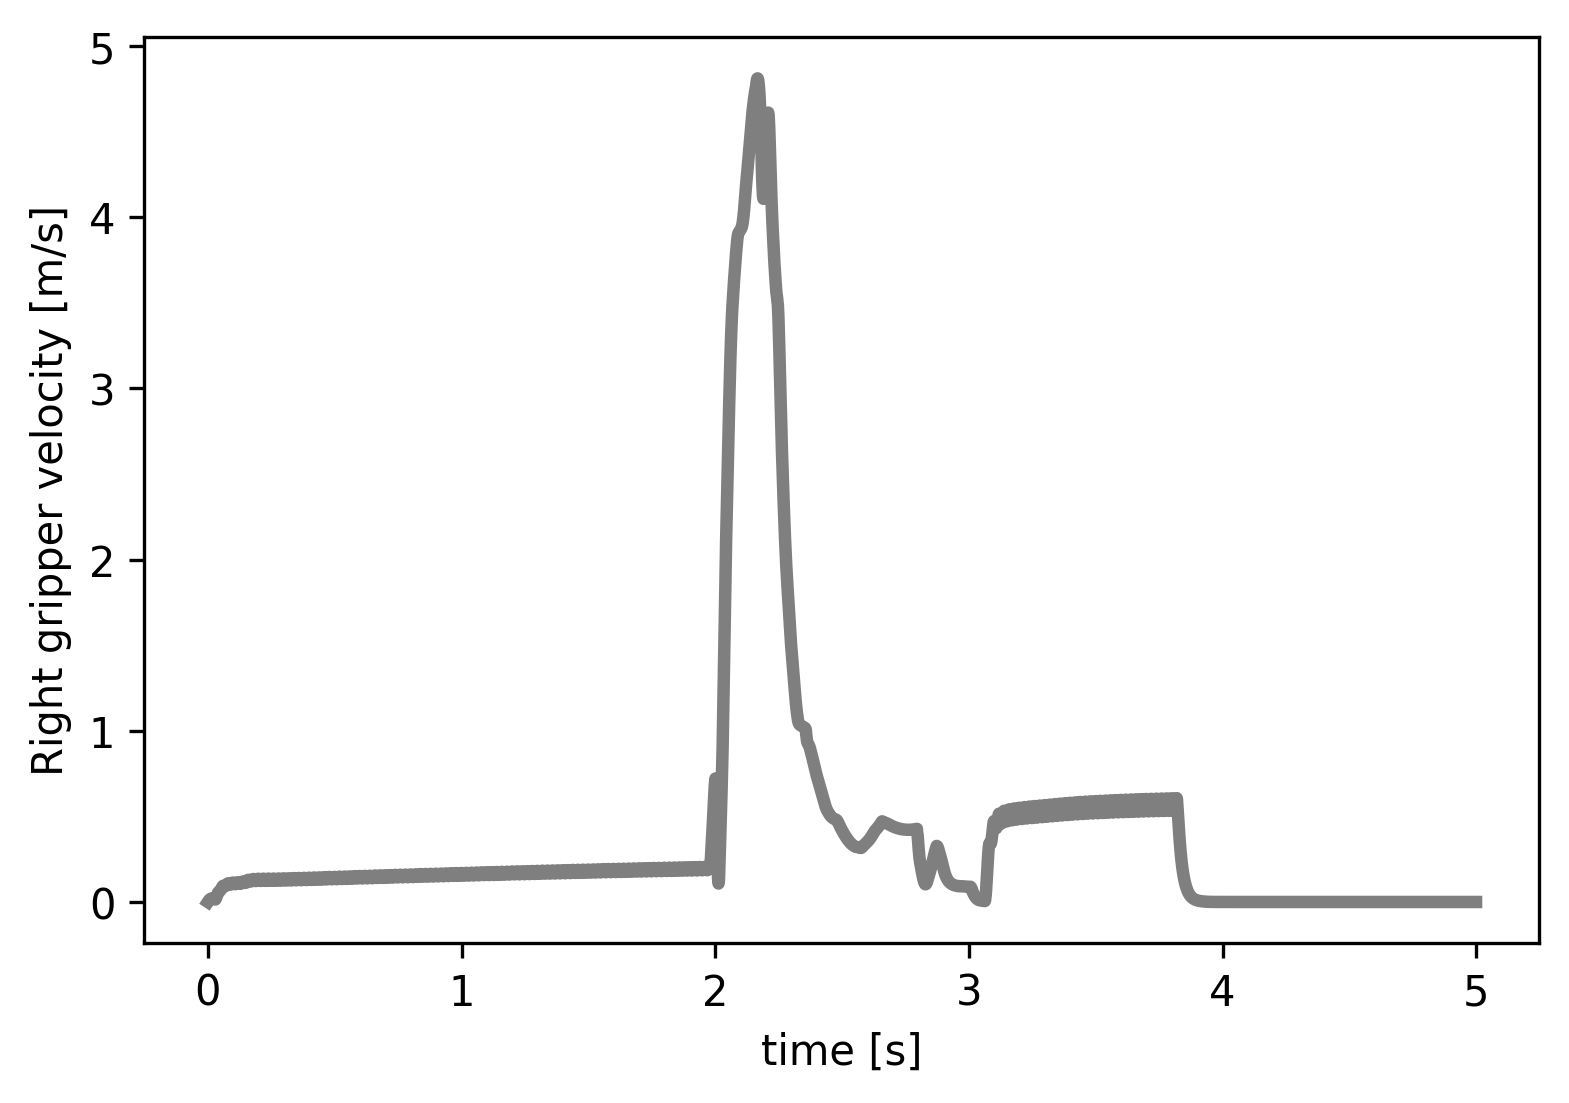

In [54]:
plt.figure(dpi=300)
# plt.plot(rg_vel_norm[:5000,0], rg_vel_norm[:5000,1],lw=3, c='r',alpha =.5)
plt.plot(rg_vel_norm1[:5000,0], rg_vel_norm1[:5000,1],lw=3, c='k',alpha =.5)
plt.ylabel('Right gripper velocity [m/s]')
plt.xlabel('time [s]')
plt.show()

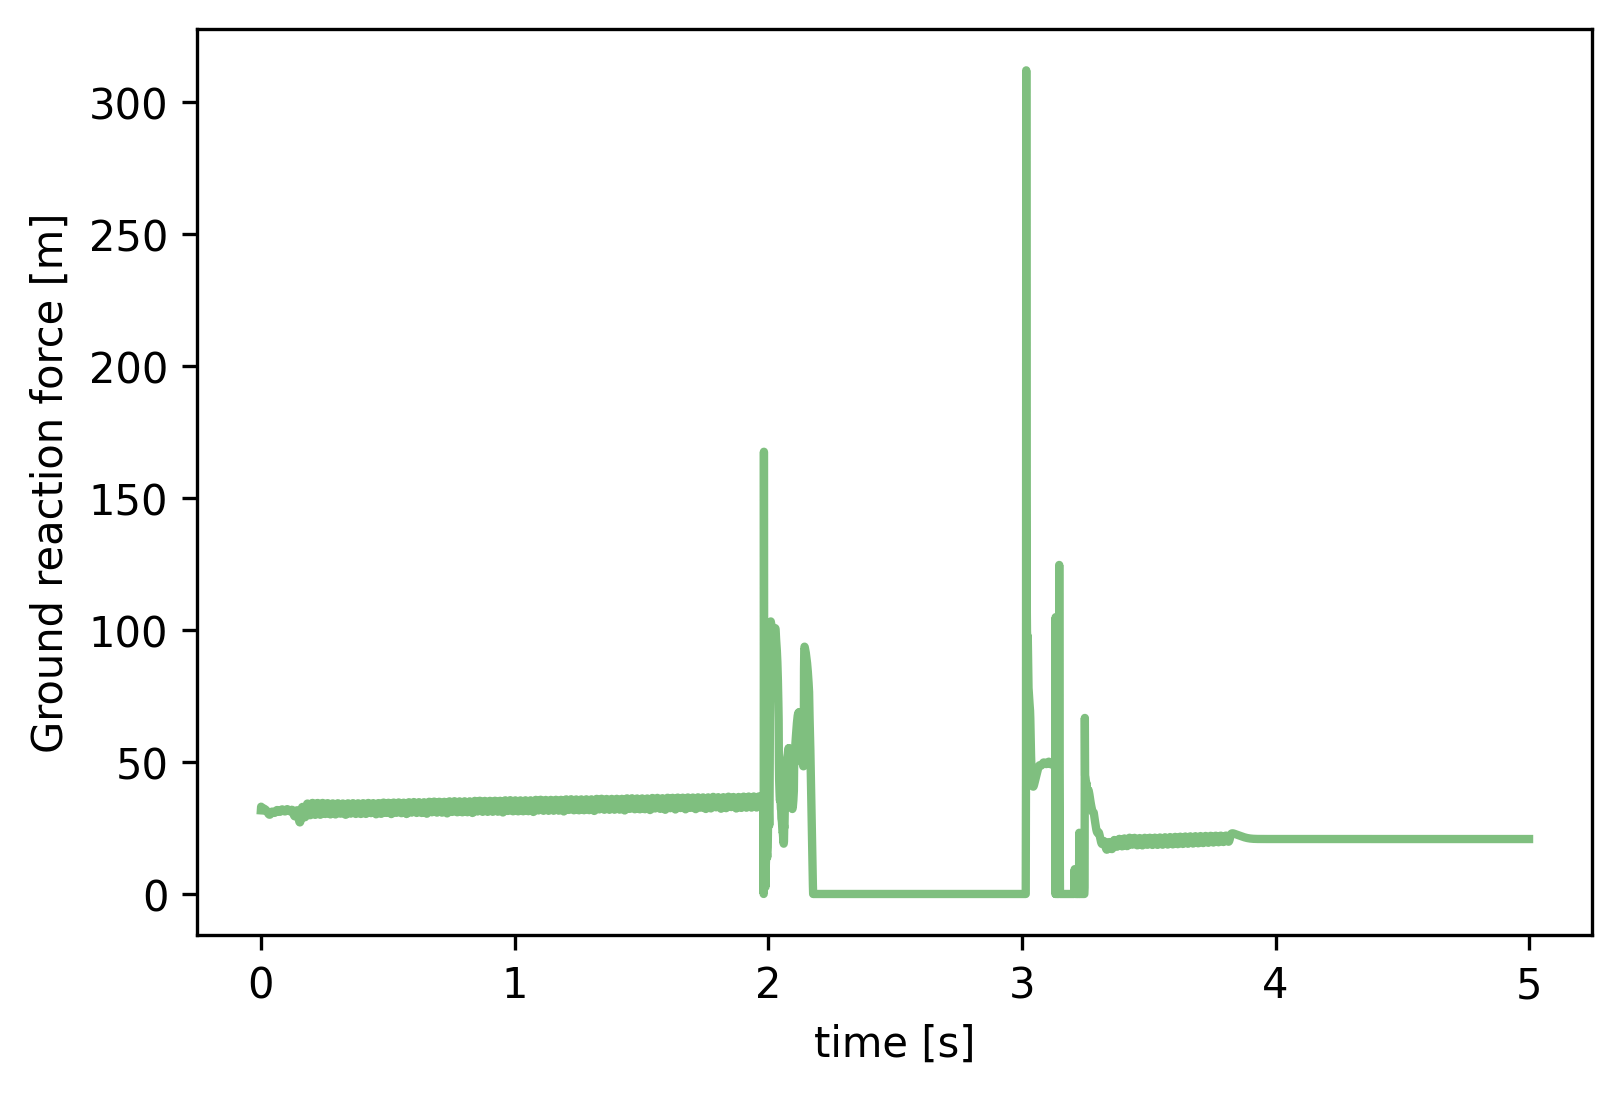

In [55]:
plt.figure(dpi=300)
plt.plot(np.arange(len(gnf_r))*0.001, gnf_r[:5000], label= "right foot", lw=2, c='g',alpha =.5)
plt.ylabel('Ground reaction force [m]')
plt.xlabel('time [s]')
plt.show()

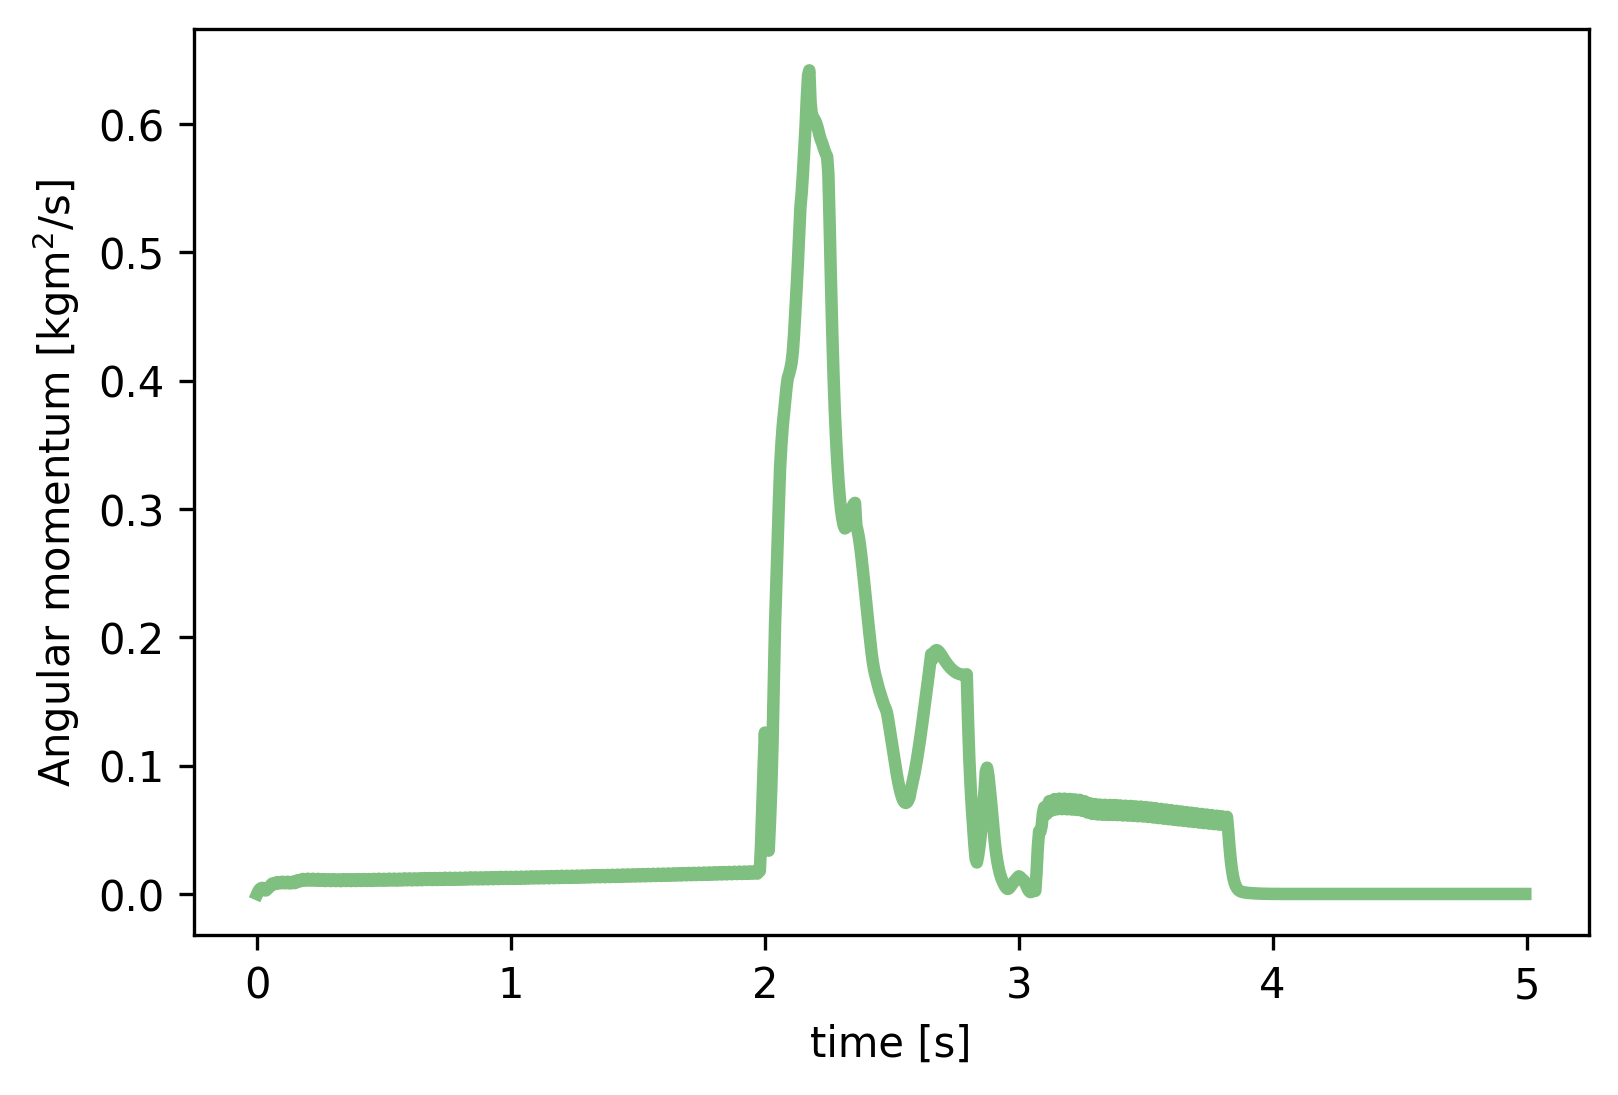

In [61]:
plt.figure(dpi=300)

am_norm = []
for i in range(am.shape[0]):
    norm = np.sqrt(am[i,1]**2 + am[i,2]**2+am[i,3]**2)
    am_norm.append(norm)

am_norm1 = []
for i in range(am1.shape[0]):
    norm = np.sqrt(am1[i,1]**2 + am1[i,2]**2+am1[i,3]**2)
    am_norm1.append(norm)
# plt.plot(am[:1000,0], am[:1000, 1], label= "x", lw=2, c='g',alpha =.5)
# plt.plot(am[:1000,0], am[:1000, 2], label= "y", lw=2, c='r',alpha =.5)
# plt.plot(am[:1000,0], am[:1000, 3], label= "z", lw=2, c='k',alpha =.5)
# plt.plot(am[:1000,0], am_norm[:1000], label= "r", lw=3, c='r',alpha =.5)
plt.plot(am1[:1000,0], am_norm1[:1000], label= "g", lw=3, c='g',alpha =.5)
# plt.legend()
plt.ylabel(r'Angular momentum [${\rm kg m^2/s}$]')
plt.xlabel('time [s]')
plt.show()

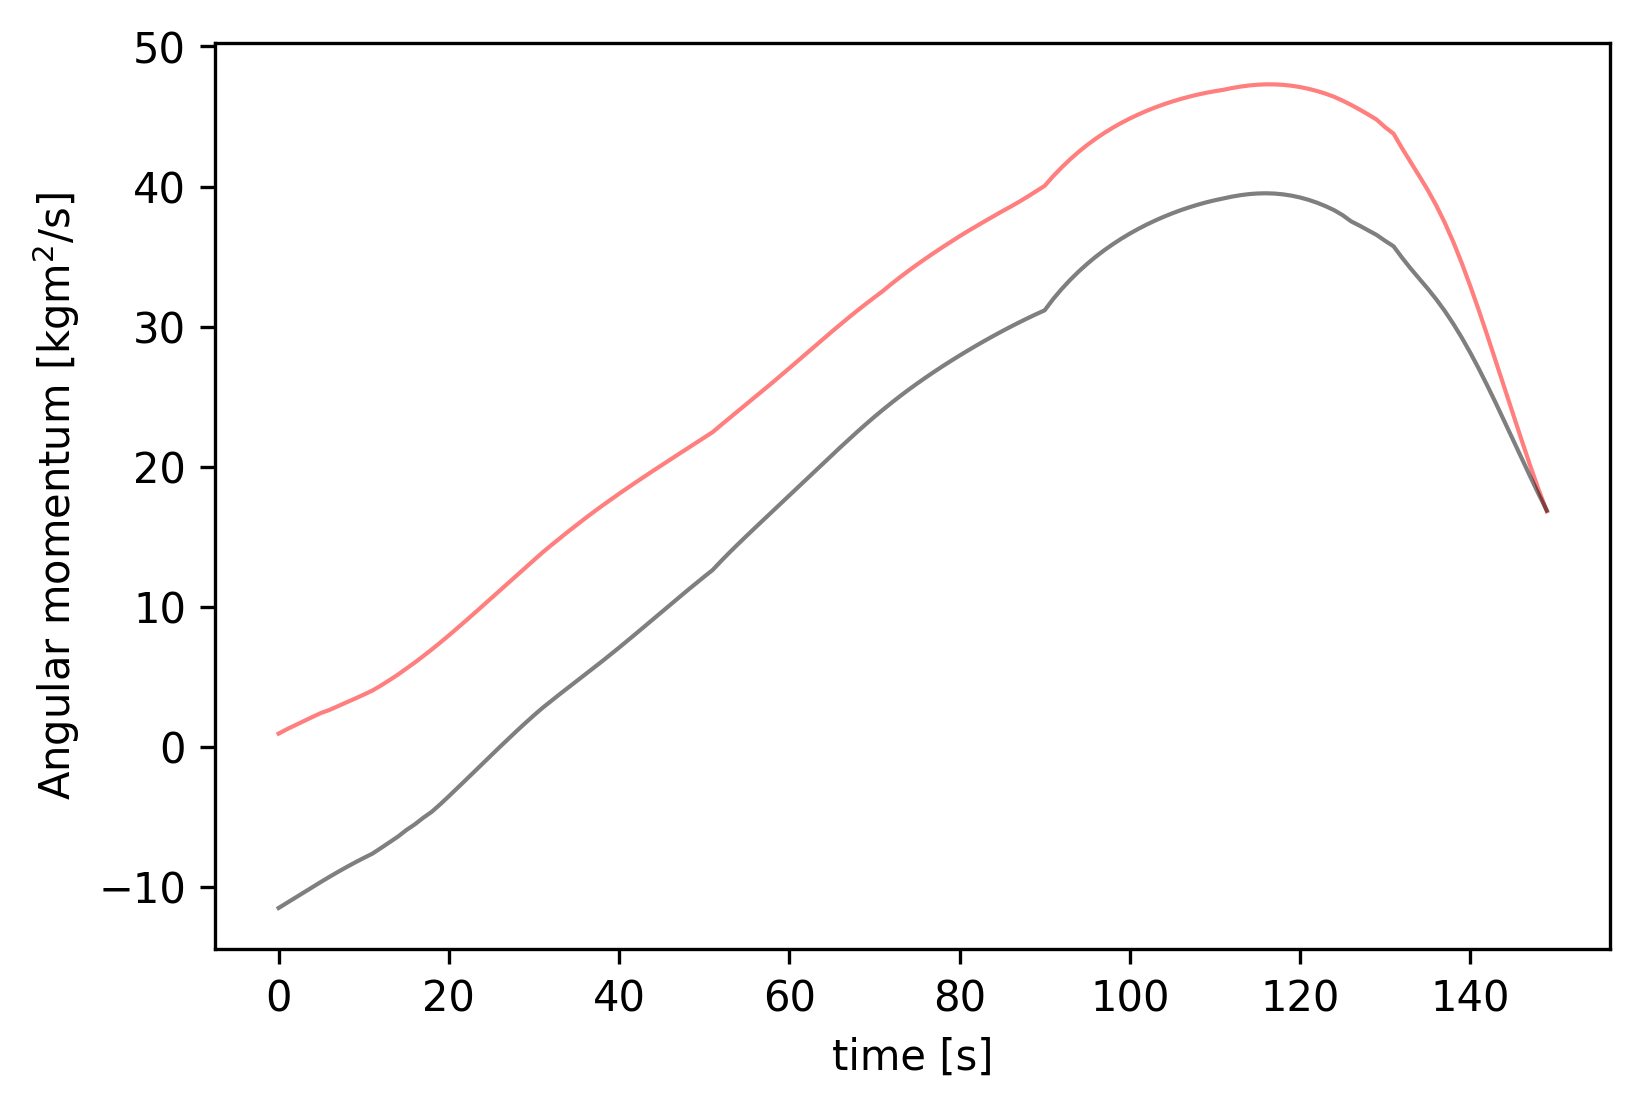

In [57]:
plt.figure(dpi=300)

vel_angle = []
for i in range(rg_vel.shape[0]):
#     rg_vel_tang = np.sqrt(rg_vel[i,0]**2 + rg_vel[i,1]**2)
    vx = rg_vel[i,0]
    vy = rg_vel[i,1]
    vz = rg_vel[i,2]
    angle = np.arctan(vz/np.sqrt(vx**2+vy**2))/np.pi*180.
    vel_angle.append(angle)

vel_angle1 = []
for i in range(rg_vel.shape[0]):
    vx = rg_vel1[i,0]
    vy = rg_vel1[i,1]
    vz = rg_vel1[i,2]
    angle = np.arctan(vz/np.sqrt(vx**2+vy**2))/np.pi*180.
    vel_angle1.append(angle)
# plt.plot(am[:1000,0], am[:1000, 1], label= "x", lw=2, c='g',alpha =.5)
# plt.plot(am[:1000,0], am[:1000, 2], label= "y", lw=2, c='r',alpha =.5)
# plt.plot(am[:1000,0], am[:1000, 3], label= "z", lw=2, c='k',alpha =.5)
plt.plot(vel_angle[2050:2200], label= "r", lw=1, c='r',alpha =.5)
plt.plot(vel_angle1[2050:2200], label= "k", lw=1, c='k',alpha =.5)
# plt.legend()
plt.ylabel(r'Angular momentum [${\rm kg m^2/s}$]')
plt.xlabel('time [s]')
plt.show()

In [65]:
final_result = [[0.]*10]
print(final_result)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [74]:
with open(folder_path1+'task_new.pkl', 'rb') as f:
    results = pickle.load(f)
final_result = []
throw_result = []

for i in range(10):
    throw_result.append([])

    
for result in results:
    if result.comz>0.2 and result.comz < .5:
        final_result.append(result)
        print('distance: ',  result.distance, 'throw time knot: ', result.throw_time, 'data group number: ',\
              result.group, 'delay: ',result.delay, 'com height: ',result.comz)
        if result.group == 5 and result.delay ==4 and result.throw_time ==8 :
            result.distance = 3.31
        throw_result[result.group-1].append(result.distance)

distance:  2.89279814262761 throw time knot:  8 data group number:  1 delay:  -8 com height:  0.2848818321894695
distance:  1.7854704103274952 throw time knot:  9 data group number:  2 delay:  -8 com height:  0.284509174676755
distance:  2.245356285137707 throw time knot:  9 data group number:  3 delay:  -8 com height:  0.2845971736840786
distance:  2.3902703332144224 throw time knot:  8 data group number:  4 delay:  -8 com height:  0.2832584122968391
distance:  2.064715116562348 throw time knot:  9 data group number:  4 delay:  -8 com height:  0.28492773067081806
distance:  2.917135382831488 throw time knot:  9 data group number:  5 delay:  -8 com height:  0.2843473213841687
distance:  2.691255954553204 throw time knot:  8 data group number:  6 delay:  -8 com height:  0.283753922342022
distance:  1.5797624642889114 throw time knot:  9 data group number:  7 delay:  -8 com height:  0.28377037589639353
distance:  2.1078314329445464 throw time knot:  9 data group number:  9 delay:  -8 com

distance:  2.230237210619 throw time knot:  9 data group number:  10 delay:  7 com height:  0.28534853360206336
distance:  2.7524512857440855 throw time knot:  8 data group number:  1 delay:  8 com height:  0.2849024764847178
distance:  1.8603718156443547 throw time knot:  9 data group number:  2 delay:  8 com height:  0.28472898151220644
distance:  2.799661883906868 throw time knot:  8 data group number:  3 delay:  8 com height:  0.289222565251121
distance:  2.1421118159722674 throw time knot:  9 data group number:  3 delay:  8 com height:  0.28381665988309984
distance:  2.4760802518165814 throw time knot:  8 data group number:  4 delay:  8 com height:  0.2825961986677836
distance:  2.0306026065639227 throw time knot:  9 data group number:  4 delay:  8 com height:  0.2839765933048225
distance:  3.2085681545419598 throw time knot:  8 data group number:  5 delay:  8 com height:  0.2856001350786673
distance:  2.9466602141198095 throw time knot:  9 data group number:  5 delay:  8 com heig

In [75]:
print(counter)

224


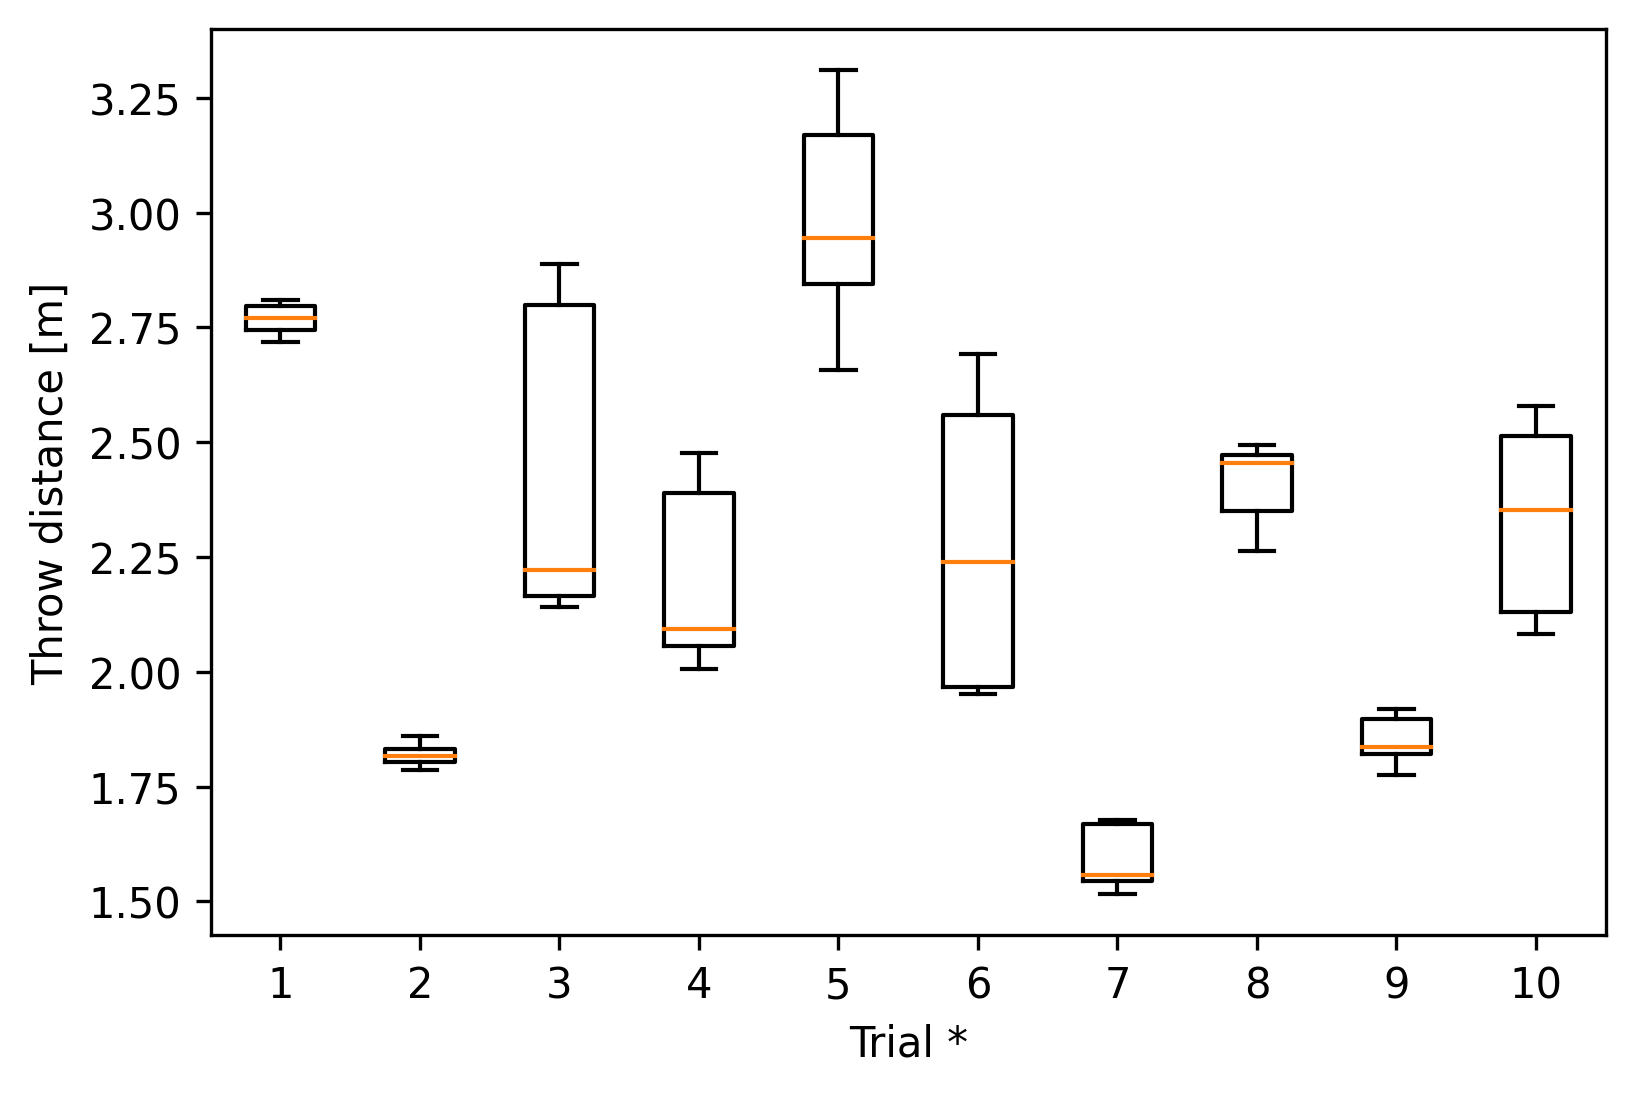

In [77]:
plt.figure(dpi=300)
plt.boxplot(throw_result, showfliers=False)
plt.ylabel('Throw distance [m]')
plt.xlabel('Trial *')
plt.show()